# **決定木分析（回帰）：dtreeviz**
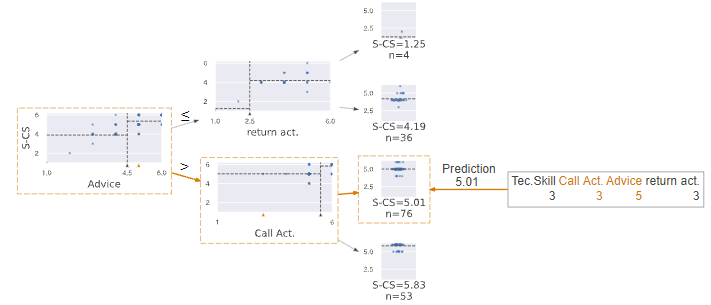

**決定木（デシジョンツリー）**　：ある対象や課題を分類・予測・判定するための条件分岐のアルゴリズムを図式化した木構造のグラフ。意思決定や戦略立案のほか、機械学習やデータマイニングの分野で用いられる。ある要素（親ノード）を起点として想定しうる結果を複数の要素（子ノード）の枝分かれで表し、条件分岐を繰り返したもの。木構造で表現できるので非常に可読性が高い。

##**説明**
これは、**Google Colab専用**の決定木分析（回帰）の自動機械学習ツールです。

1.   まず、ランタイム → すべてのセルを実行 してください。
2.   つぎに「2.ファイル読込み」に移動してください。ライブラリのインポートが完了すると [ファイル選択] ボタンが表示されますので、ボタンをクリックし、csvファイルを指定してください。\
※データ形式は、以下の事前準備参照
3.   「3.決定木（木の深さ2,3,4）」に移動すると、木の深さ毎の決定木が確認できます。（※depth2.svg,depth3.svg,depth4.svg データとしても出力します）
4.   「4.決定木回帰分析」では、データを学習データとテストデータに分割し、交差検証実施後の精度や誤差と、最適な木の深さの決定木が表示します。

##**事前準備**
*   読込みデータは**csv**です。以下のようにX(説明変数)を並べた後、最終列にy(目的変数)を配置したデータとしてください。

>|X1 |X2 |X3 |X4 |X5 |X6 |X7 |・・・|y |
|---|---|---|---|---|---|---|---|---|
|5 |2 |3 |  |  |  |  |  |12|
|4 |5 |8 |　|  |  |  |  |18|

*   データは**数値データ**としてください。
*   カラム名が日本語の場合、文字化けします。**カラム名は英字に変更**しておいてください。

※欠損値があれば、その行は取り除いて分析します。


# **1.ライブラリのインストールとインポート**

In [ ]:
pip install japanize-matplotlib

In [ ]:
# Import required libraries 
%matplotlib inline 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import japanize_matplotlib 
import seaborn as sns 
sns.set(font="IPAexGothic")  
from scipy.stats import norm

In [ ]:
pip install graphviz

In [ ]:
pip install dtreeviz

In [ ]:
from sklearn import tree
from dtreeviz.trees import *
import graphviz

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# **2.ファイル読込み**
**★ [ファイル選択] ボタンにて決定木分析したいcsvファイルを選択してください**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CS_train.csv to CS_train (1).csv


## データ処理

In [ ]:
if len(uploaded.keys()) != 1:
    print("アップロードは１ファイルにのみ限ります")
else:
    target = list(uploaded.keys())[0]

In [ ]:
df = pd.read_csv(target)

In [ ]:
# 欠損値のある行を削除（※ how ='any' は欠損がひとつでもあれば、その行を削除）
df = df.dropna(how='any')

In [ ]:
df

,Tec.Skill,Complain Act.,Call Act.,Visit number,Advice,return act.,QA,S-CS
0,6,6,6,6,6,6,6,6
1,6,6,6,6,6,6,6,6
2,6,6,5,5,6,5,5,6
3,4,4,4,4,4,4,4,4
4,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...
164,6,6,6,5,6,6,4,6
165,5,5,5,5,5,5,5,5
166,6,5,6,5,5,6,5,6
167,5,4,4,4,4,4,4,4


In [ ]:
FEATURES = df.columns[:-1]
TARGET = df.columns[-1]

X = df.loc[:, FEATURES]
y = df.loc[:, TARGET]

# **3.決定木（木の深さ2,3,4）**
決定木は木の深さが増すほど解釈や説明はむつかしく、シンプルなほど解釈はしやすい。以下では比較的解釈が容易な深さ2,3,4の決定木を描かせている。
*   #orientation='LR' の # を消すと、決定木の表示は横向きになる
*   予測したいXの値を X=[X1,X2,X3,X4,…] に設定すれば、予測値が表示される

##決定木：木の深さ2

In [184]:
#決定木分析と出力
dtree = tree.DecisionTreeRegressor(max_depth=2)
dtree.fit(X,y)

viz = dtreeviz(dtree,X,y,
               target_name = TARGET,
               feature_names = FEATURES,
               #orientation='LR'
               #X = [3,3,5,3]
              )

viz

In [ ]:
viz.save("depth2.svg")

## 決定木：木の深さ3

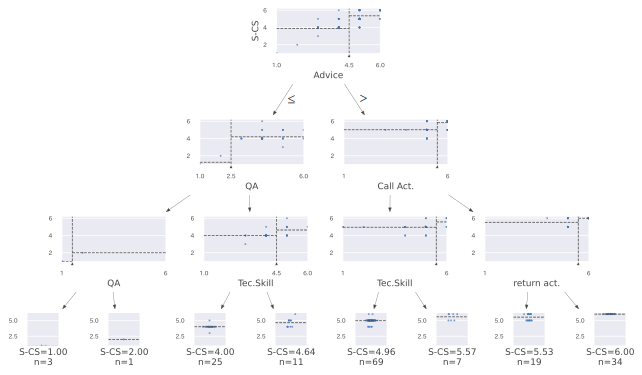

In [ ]:
#決定木分析と出力
dtree = tree.DecisionTreeRegressor(max_depth=3)
dtree.fit(X,y)

viz = dtreeviz(dtree,X,y,
               target_name = TARGET,
               feature_names = FEATURES,
               #orientation='LR',
               #X = [3,3,5,3]
              )

viz

In [ ]:
viz.save("depth3.svg")

## 決定木：木の深さ4

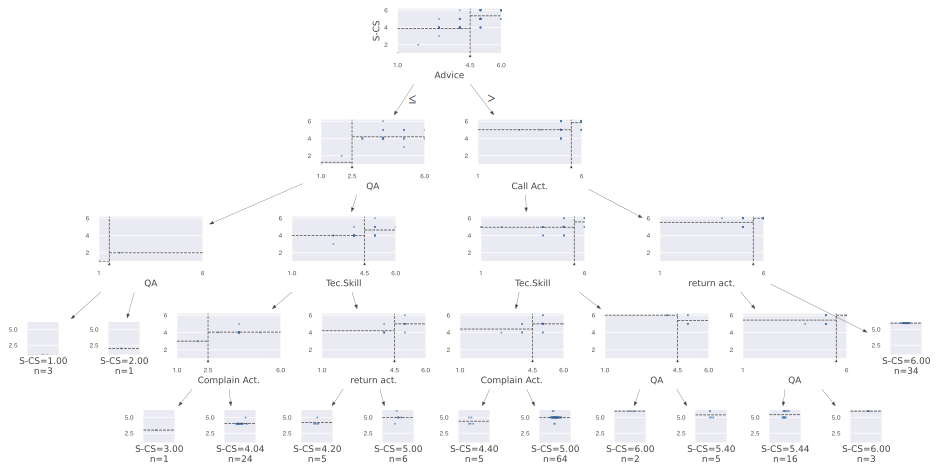

In [ ]:
#決定木分析と出力
dtree = tree.DecisionTreeRegressor(max_depth=4)
dtree.fit(X,y)

viz = dtreeviz(dtree,X,y,
               target_name = TARGET,
               feature_names = FEATURES,
               #orientation='LR',
               #X = [3,3,5,3]
              )

viz

In [ ]:
viz.save("depth4.svg")

# **4.決定木回帰分析**

##**学習データとテストデータに分割 → 最適深さを学習**　　
*   default：test‗size=0.25 ←75％学習/25％テスト ※任意変更可リスト項目

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25,
    random_state = 1)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dtr = DecisionTreeRegressor(random_state=0)

gs_dtr = GridSearchCV(dtr,
                      param_grid = {'max_depth': [2,3,4,5]},
                      cv = 10)

gs_dtr.fit(X_train, y_train)

y_train_pred = gs_dtr.predict(X_train)
y_test_pred = gs_dtr.predict(X_test)

gs_dtr.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

##**決定木回帰による予測結果（y_pred）とテストデータ（y_test）の関係を可視化**
*   各点が、右肩上がりの直線に近いほうが当てはまりがよい。



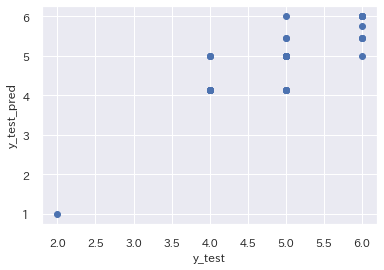

In [ ]:
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.savefig('test_pred_plot.jpg')

##**残差プロット**
*   各点が赤線（＝残差0）に近いほうが当てはまりがよい。
*   学習データ（Training‗data）だけが赤線近くに分布している場合、過学習の可能性がある。


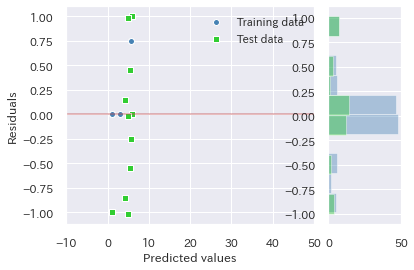

In [180]:
fig = plt.figure(linewidth=1.5)

# 1行4列のグリッドを作成
grid = plt.GridSpec(1, 4)
# 0行目だけ、0～2列目の3列分を使用
ax1 = fig.add_subplot(grid[0, 0:3])
ax2 = fig.add_subplot(grid[0, 0:3])
ax3 = fig.add_subplot(grid[0, 0:3])
# 0行目だけ、4列目だけを使用
ax4 = fig.add_subplot(grid[0, 3])
ax5 = fig.add_subplot(grid[0, 3])

ax1.set_xlabel('Predicted values')
ax1.set_ylabel('Residuals')

ax1.set_xlim([-10, 50])
#ax1.set_facecolor('whitesmoke')
ax1.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
ax2.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
ax1.legend()

#ax4.set_facecolor('whitesmoke')
ax3.hlines(y=0, xmin=-10, xmax=50, color='r', lw=1.5, alpha=0.5)
ax4.hist((y_train-y_train_pred), orientation="horizontal",color='steelblue',alpha=0.40)
ax5.hist((y_test-y_test_pred), orientation="horizontal",color='limegreen',alpha=0.40)

plt.show()

##**決定木回帰モデルの評価**
*   MSE（平均二乗誤差）
*   RMSE（二乗平均平方根誤差）
*   R^2（決定係数）





In [183]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE  train: %.3f,　test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('RMSE train: %.3f,  test: %.3f' %(
        np.sqrt(mean_squared_error(y_train, y_train_pred)),
        np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('R^2  train: %.3f,  test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE  train: 0.125,　test: 0.259
RMSE train: 0.354,  test: 0.509
R^2  train: 0.864,  test: 0.614


##**決定木回帰（最適学習深さ）**

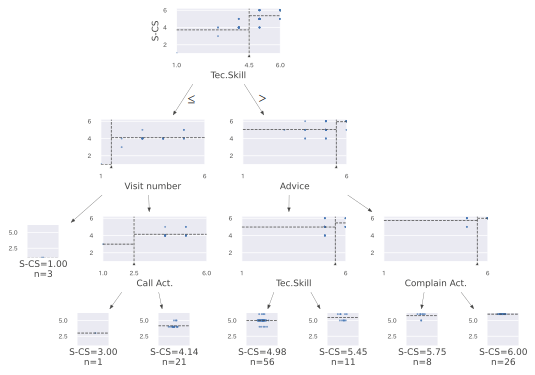

In [ ]:
viz = dtreeviz(gs_dtr.best_estimator_,
               X_train,
               y_train,
               target_name = TARGET,
               feature_names = FEATURES,
               #orientation='LR',
               #X = [3,3,5,3]
              )

viz

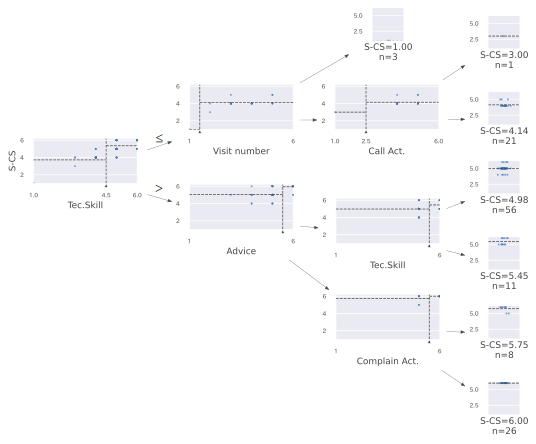

In [ ]:
viz = dtreeviz(gs_dtr.best_estimator_,
               X_train,
               y_train,
               target_name = TARGET,
               feature_names = FEATURES,
               orientation='LR',
               #X = [3,3,5,3]
              )

viz

https://github.com/parrt/dtreeviz